In [1]:
import pandas as pd
import numpy as np
import wave
from scipy.io import wavfile
from scipy.signal import resample
import matplotlib.pyplot as plt
import seaborn as sns
import pyautogui
from tqdm import tqdm

In [2]:
# loading in data

df = pd.read_csv('data/raw_recording_1.csv',dtype={'muscle_data':object})
df

,x_pos,y_pos,channel_1,channel_2,channel_3,channel_4
0,2272.0,659.0,319,19,0,83
1,2268.0,661.0,22,32,0,83
2,2265.0,664.0,22,31,12,83
3,2265.0,664.0,22,31,16,111
4,2265.0,664.0,21,31,16,111
...,...,...,...,...,...,...
122532,1577.0,1148.0,13,28,6,351
122533,1577.0,1148.0,13,28,6,351
122534,1581.0,1148.0,13,28,6,351
122535,1581.0,1148.0,13,28,6,350


In [3]:
# df = df[:int(len(df) * 10/100)]

# for i in tqdm(range(0,10000)):

#     df[f'channel_1_{i}'] = df['channel_1'].shift(i)
#     df[f'channel_2_{i}'] = df['channel_2'].shift(i)
#     df[f'channel_3_{i}'] = df['channel_3'].shift(i)
#     df[f'channel_4_{i}'] = df['channel_4'].shift(i)

In [4]:
# making columns that will be predicted on

df['x_diff'] = df['x_pos'].diff()
df['y_diff'] = df['y_pos'].diff()
df.dropna(inplace=True)

In [5]:
df.head()

,x_pos,y_pos,channel_1,channel_2,channel_3,channel_4,x_diff,y_diff
1,2268.0,661.0,22,32,0,83,-4.0,2.0
2,2265.0,664.0,22,31,12,83,-3.0,3.0
3,2265.0,664.0,22,31,16,111,0.0,0.0
4,2265.0,664.0,21,31,16,111,0.0,0.0
5,2265.0,664.0,21,31,16,11,0.0,0.0


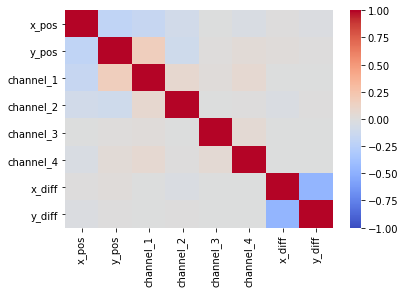

In [6]:
# using heatmap to visualize correlations
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1)

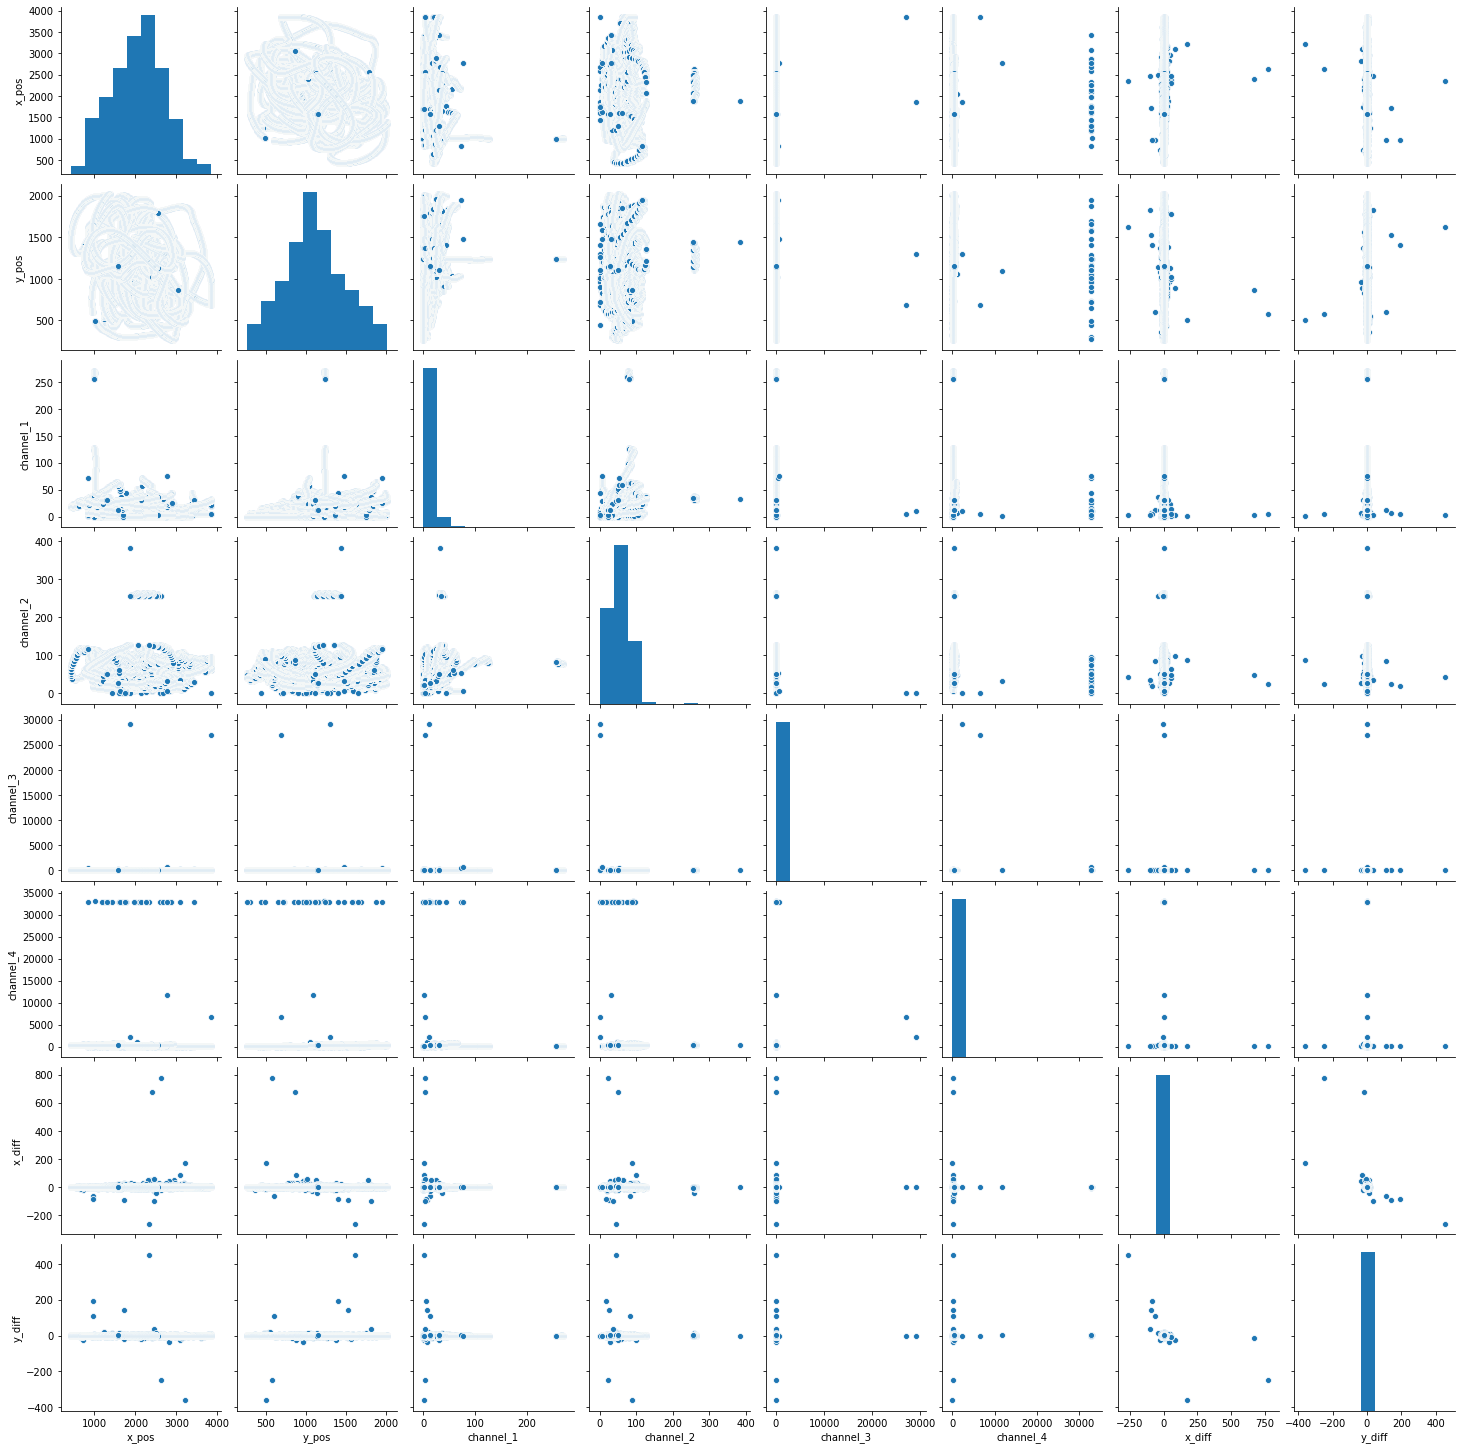

In [7]:
# usning pairplot to visualize correlations and distributions
sns.pairplot(df)

In [8]:
# plotting channels and differences in mouse postions


plt.figure(figsize=(200,200))

plt.plot(df['channel_1'])
plt.plot(df['channel_2'])
plt.plot(df['channel_3'])
plt.plot(df['channel_4'])

plt.plot(df['x_diff'])
plt.plot(df['y_diff'])